In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import chart_studio
chart_studio.tools.set_credentials_file(username='nguyenhuycuong06', api_key='••••••••••') #Need username and api_key to access potly library
import chart_studio.plotly as py
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import emoji
from termcolor import colored
pd.set_option('display.max_colwidth', -1)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('data_edited.csv') # new data we got after part 1
data.head(10)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,JobType,LowestSalary,HighestSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves on filling&#8232; shelves faster than anyone else in the industry. \n,NaN,NaN,0,30
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves on filling &#8232;shelves faster than anyone else in the industry. \n,NaN,NaN,0,30
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - Womens Fashion - SUNSHINE PLAZA,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,NaN,0,30
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors and want to work with like minded people? We are on the lookout for new team members to join our busines,NaN,NaN,0,30
4,"Business Banking Contact Centre Specialist, Night Shift, Sydney Olympic Park",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic and professional individuals who are looking to work night shift.....",NaN,NaN,0,30
5,"Business Banking Contact Centre Specialist, Night Shift, Sydney Olympic Park",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic and professional individuals who are looking to work night shift.....",NaN,NaN,0,30
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a casual Café All-rounder (up to 30 hours per week) to join our team.,NaN,NaN,0,30
7,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Café All-rounder (up to 15 hours per week) to join our team.,NaN,NaN,0,30
8,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services business seeking experienced outbound callers. Must be KPI & target focused.,NaN,NaN,0,30
9,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual Dish Hand (up to 30 hours per week) to join our team.,NaN,NaN,0,30


> It looks like missing value still there.

In [3]:
data.count()

Title                318477
Company              306473
Date                 318477
Location             197229
Area                 122658
Classification       197229
SubClassification    197229
Requirement          318470
FullDescription      302300
JobType              302379
LowestSalary         318477
HighestSalary        318477
dtype: int64

# Part 2 - Data Analysis and Interpretation
###### Pham Binh An - 16520016
###### Nguyen Huy Cuong - 16520148

In [3]:
data=data.fillna('NA')
data.count()

Title                318477
Company              318477
Date                 318477
Location             318477
Area                 318477
Classification       318477
SubClassification    318477
Requirement          318477
FullDescription      318477
JobType              318477
LowestSalary         318477
HighestSalary        318477
dtype: int64

In [4]:
## TRY TO SPLIT REAL INFORMATION - JOB FROM COLUMN TITLE

#Create new column Job
data['Job'] = data['Title']

#Remove string end with $
data['Job'] = [re.sub(r'[@]$','',a) for a in data['Job']]

#Remove string start with &
data['Job'] = [re.sub(r'^[&]','',a) for a in data['Job']]

#Remove - at first character
data['Job'] = [re.sub('^[-]','',a) for a in data['Title']]

#Remove space 
data['Job'] = [re.sub(r' ','',a) for a in data['Job']]

#Remove $ at first chracter
data['Job'] = [re.sub('^[$]','',a) for a in data['Title']]

#Remove ! at first chracter
data['Job'] = [re.sub('^[!]','',a) for a in data['Title']]

#Get the string before '-'
data['Job'] = data['Job'].str.split('-')
data['Job'] = [x[0] for x in data['Job']]

#Get the string before '$'
data['Job'] = data['Job'].str.split('$')
data['Job'] = [x[0] for x in data['Job']]

#Get the string before '|'
data['Job'] = data['Job'].str.split('|')
data['Job'] = [x[0] for x in data['Job']]

#Get the string before '!'
data['Job'] = data['Job'].str.split('!')
data['Job'] = [x[0] for x in data['Job']]

#Remove Star character in Job
data['Job'] = [re.sub(r'★','',k) for k in data['Job']]

#Delete emoji character 
data['Job'] = [emoji.get_emoji_regexp().sub(r'', k) for k in data['Job']]

#Remove rest character 
data['Job'] = [re.sub(r'[x2,x3,x4]','',k) for k in data['Job']]

#Remove | character 
data['Job'] = [re.sub('[$0-9]','',k) for k in data['Job']]

data['Job'] = [re.sub('([0-9]-[0-9]year)','',k) for k in data['Job']]

#Remove space at last
data['Job'] = data['Job'].str.rstrip()

In [24]:
data[data['Job'] == ''].head(2)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,JobType,LowestSalary,HighestSalary,Job
818,8-12 Tonne Trays or Tauts (all areas),NA,2018-10-07,Melbourne,CBD & Inner Suburbs,"Manufacturing, Transport & Logistics","Couriers, Drivers & Postal Services","Flexible hours, top rates!","ATLASTRANSPORT8-12 Tonne Trays orTauts (All Areas)Flexible Hours, Top RatesContact Dan: (03) 9767 6565",Full Time,0,30,
1443,2018 - Retail Assistant,Aldi Stores,2018-10-06,Wagga Wagga & Riverina,NA,Retail & Consumer Products,Retail Assistants,"Whether they’re racing to fill shelves or scanning through customers, our Retail Assistants can do everything and anything.","At ALDI, our people are the key to our success.\nWe're looking for high energy team members who love to keep active and busy. A Retail Assistant at ALDI needs to be able to thrive in a fast paced, team environment and always be willing to go the extra mile for their customers and team. The role\n is physical in nature, so you'll need to enjoy hands-on work and meeting deadlines and our shifts can start at 6am some mornings, and finish at 10pm others, so being flexible and available any 5 out of 7 days is important. Finally, prior experience\n in a fast paced, retail environment will be viewed favourably; however a positive attitude and hardworking spirit are an absolute must.\nWhat's in it for you? \n\nMarket leading remuneration - $24.55 per hour*\nBe a part of a leading international retailer\nCareer opportunities in our rapidly growing store network including progression to Store Management Trainee\nExtensive training and development.\nRotating roster and guaranteed contracted hours.\n4 weeks annual leave\nWork alongside friendly and supportive colleagues\n\nYou will be responsible for: \n\nMaintaining and replenishing stock storewide\nOperating manual pallet moving equipment\nMerchandising stock storewide\nServing and assisting customers in a professional and efficient manner\nOperating tills and calculating change manually\n\n*Hourly rate for Retail Assistants over 18 years of age.",Part Time,0,30,


In [28]:
data['Title'].value_counts().head(20)

# If 'Job' in Title, not any other information, the result is returned.

Project Manager                    1298
Business Analyst                   830 
Business Development Manager       817 
Administration Assistant           725 
Executive Assistant                660 
Receptionist                       609 
Registered Nurse                   594 
Customer Service Officer           517 
Administration Officer             500 
Senior Project Manager             429 
Account Manager                    408 
Property Manager                   404 
Payroll Officer                    402 
Recruitment Consultant             394 
Customer Service Representative    390 
Electrician                        378 
Senior Business Analyst            377 
Accounts Payable Officer           344 
Contract Administrator             342 
Site Manager                       341 
Name: Title, dtype: int64

In [29]:
data['Job'].value_counts().head(20)

# Split 'Job' from Title, only Job is returned each row. 

Project Manager                    2789
Business Development Manager       1770
Registered Nurse                   1738
Business Analyst                   1553
Store Manager                      1153
Administration Assistant           992 
Eecutive Assistant                 882 
Customer Service Officer           871 
Receptionist                       868 
Site Manager                       827 
Senior Project Manager             786 
Account Manager                    772 
Casual Café All                    738 
Recruitment Consultant             737 
Physiotherapist                    714 
Administration Officer             707 
Senior Business Analyst            705 
Customer Service Representative    646 
Assistant Store Manager            641 
Property Manager                   636 
Name: Job, dtype: int64

> The splits/separations reduce unnecessary interference information from Title. The splits are not so perfect but we think it could be acceptable.

## 1) Describe the job’s attributes

### o What is the sector, sub-sector of each job ?

> + Sectors : The industry that the job depend on like Information & Technology, E-Commerce, Entertainment,...
> + Sub-Sectors: They are the sub-class of Sectors

In [50]:
data['Classification'].value_counts().head()

# NA occupies the majority of Classification

NA                                        121248
Information & Communication Technology    22796 
Trades & Services                         17976 
Healthcare & Medical                      17085 
Hospitality & Tourism                     15523 
Name: Classification, dtype: int64

In [52]:
#Create another dataframe to display job base on classifcation/sub-classification
job = data[(data.Classification!='NA')][['Classification', 'SubClassification', 'Job']]

#Reset index of 'job' dataframe
job = job.reset_index()
job = job.drop('index', axis=1)

In [57]:
print('Sector and Sub-Sector for each job: ')
job.drop_duplicates()

Sector and Sub-Sector for each job: 


,Classification,SubClassification,Job
0,Retail & Consumer Products,Retail Assistants,Casual Stock Replenisher
2,Retail & Consumer Products,Retail Assistants,RETAIL SALES SUPERSTARS and STYLISTS Wanted
3,Retail & Consumer Products,Retail Assistants,Team member
4,Call Centre & Customer Service,Sales - Inbound,Business Banking Contact Centre Specialist Night Shift Sydney Olympic Park
5,Call Centre & Customer Service,Customer Service - Call Centre,Business Banking Contact Centre Specialist Night Shift Sydney Olympic Park
6,Hospitality & Tourism,Waiting Staff,Casual Café All
8,Call Centre & Customer Service,Sales - Outbound,Telemarketer
9,Hospitality & Tourism,Kitchen & Sandwich Hands,Casual Dish Hand in Brighton
10,Banking & Financial Services,Banking - Retail/Branch,Sales and Service Banking Consultant
11,Call Centre & Customer Service,Customer Service - Customer Facing,Customer Service Client Nurturer


### o Where is the location of the job ?

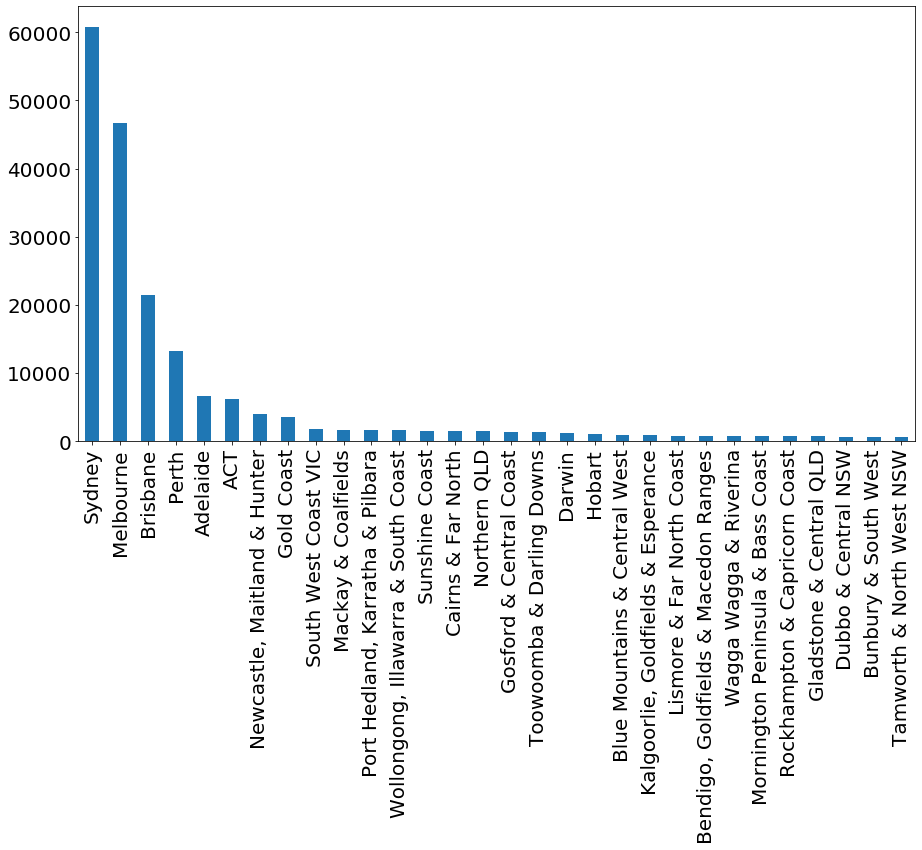

In [90]:
# With Locaions
location = data[data.Location!='NA'][[ 'Location','Job']].reset_index().drop('index', axis=1)
loc = location['Location'].value_counts().head(30) # Top 30 locations have highest demand on jobs
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 20})
loc.plot(kind='bar')

> From above chart, Sydney, Melbourne, Brisbane, Perth are locations that have high demand on jobs through numbers.

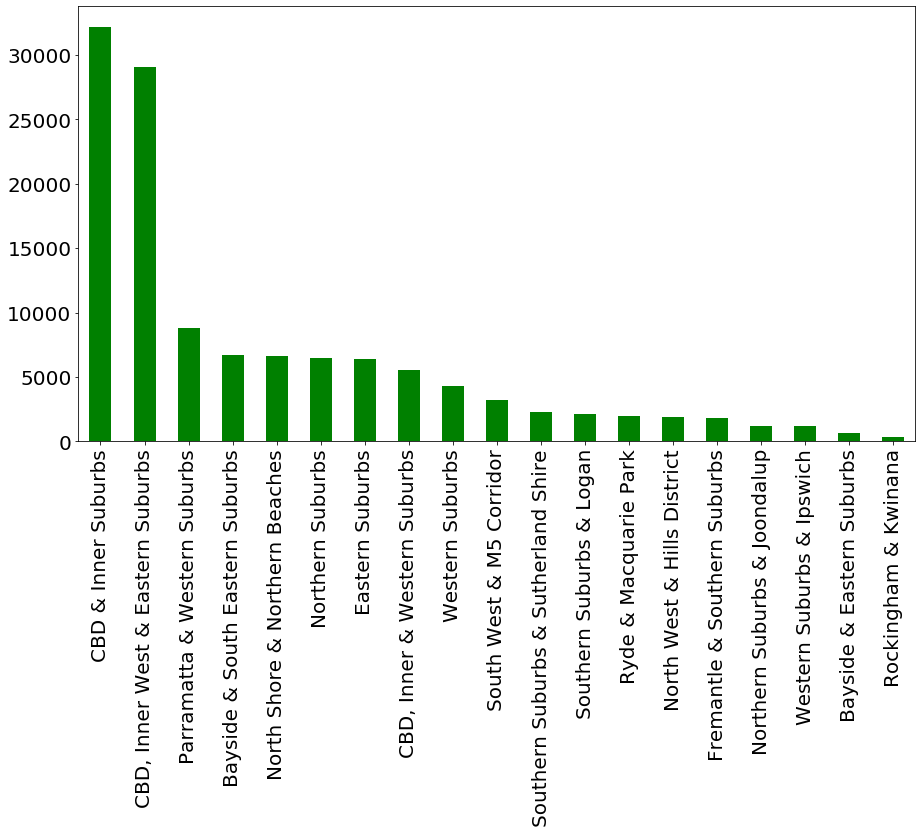

In [95]:
# With Areas
area = data[data.Area!='NA'][[ 'Area','Job']].reset_index().drop('index', axis=1)
are = area['Area'].value_counts()
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 20})
are.plot(kind='bar',color='green')

> From above chart, CBD & Inner Suburbs and CBD, Inner West & Eastern Suburbs are areas that attract most job seekers through numbers.

In [107]:
area['Area'].value_counts()

CBD & Inner Suburbs                    32170
CBD, Inner West & Eastern Suburbs      29059
Parramatta & Western Suburbs           8769 
Bayside & South Eastern Suburbs        6707 
North Shore & Northern Beaches         6656 
Northern Suburbs                       6436 
Eastern Suburbs                        6361 
CBD, Inner & Western Suburbs           5570 
Western Suburbs                        4285 
South West & M5 Corridor               3190 
Southern Suburbs & Sutherland Shire    2239 
Southern Suburbs & Logan               2137 
Ryde & Macquarie Park                  1960 
North West & Hills District            1905 
Fremantle & Southern Suburbs           1804 
Northern Suburbs & Joondalup           1199 
Western Suburbs & Ipswich              1190 
Bayside & Eastern Suburbs              657  
Rockingham & Kwinana                   364  
Name: Area, dtype: int64

In [98]:
data[(data.Location!='NA') & (data.Area!='NA')].count()

Title                122658
Company              122658
Date                 122658
Location             122658
Area                 122658
Classification       122658
SubClassification    122658
Requirement          122658
FullDescription      122658
JobType              122658
LowestSalary         122658
HighestSalary        122658
Job                  122658
dtype: int64

In [126]:
print('Through analysis, we found some: ')
print(f'- Number of unique locations from %s: {data.Location.value_counts().count()}' % (colored('original data','blue')))
print(f'- Number of unique locations from %s: {data[(data.Location!="NA")].Location.value_counts().count()}' % (colored('original data when col "Location" not NA','blue',attrs=['bold'])))
print(f'- Number of unique areas from %s: {data.Area.value_counts().count()}' % (colored('original data','red')))
print(f'- Number of unique areas from %s: {data[(data.Area!="NA")].Location.value_counts().count()}' % (colored('original data when col "Area" not NA','red',attrs=['bold'])))

Through analysis, we found some: 
- Number of unique locations from original data: 66
- Number of unique locations from original data when col "Location" not NA: 65
- Number of unique areas from original data: 20
- Number of unique areas from original data when col "Area" not NA: 4


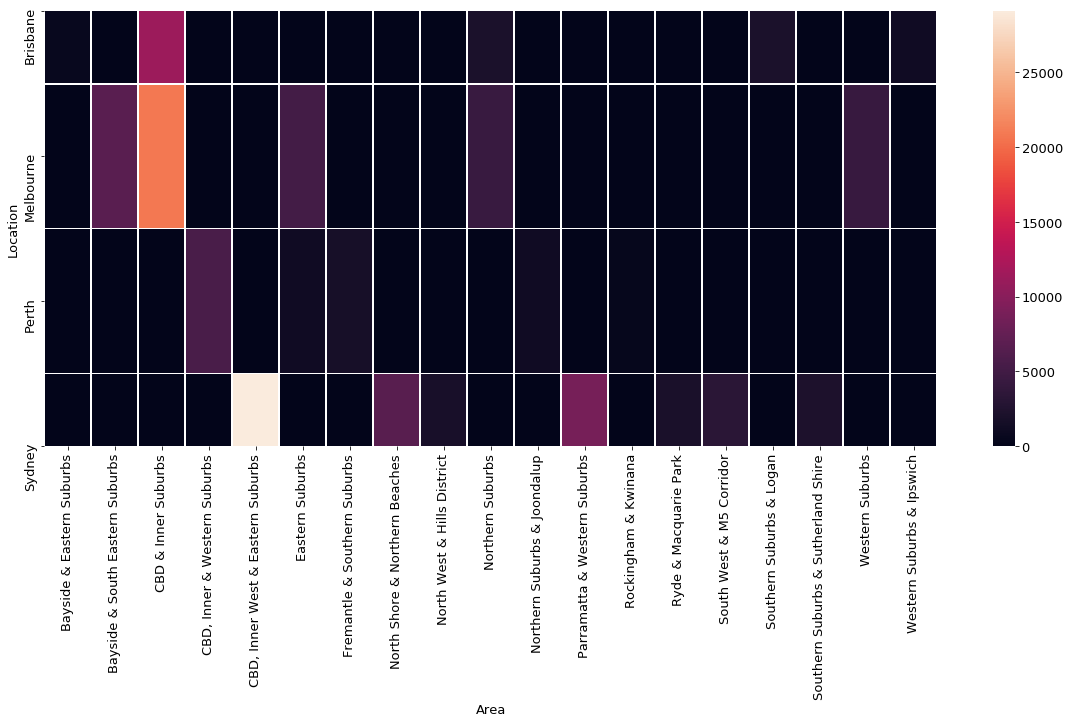

In [7]:
loc_area=data[(data.Location!='NA') & (data.Area!='NA')][['Location','Area']]
loc_area=pd.crosstab(loc_area.Location,loc_area.Area)

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(20,8))
sb.heatmap(loc_area,linewidths=.5)

In [10]:
loc_area=data[(data.Location!='NA') & (data.Area!='NA')][['Location','Area']]
pd.crosstab(loc_area.Location,loc_area.Area)

Area,Bayside & Eastern Suburbs,Bayside & South Eastern Suburbs,CBD & Inner Suburbs,"CBD, Inner & Western Suburbs","CBD, Inner West & Eastern Suburbs",Eastern Suburbs,Fremantle & Southern Suburbs,North Shore & Northern Beaches,North West & Hills District,Northern Suburbs,Northern Suburbs & Joondalup,Parramatta & Western Suburbs,Rockingham & Kwinana,Ryde & Macquarie Park,South West & M5 Corridor,Southern Suburbs & Logan,Southern Suburbs & Sutherland Shire,Western Suburbs,Western Suburbs & Ipswich
Location,,,,,,,,,,,,,,,,,,,
Brisbane,657,0,11346,0,0,0,0,0,0,2082,0,0,0,0,0,2137,0,0,1190
Melbourne,0,6707,20824,0,0,5127,0,0,0,4354,0,0,0,0,0,0,0,4285,0
Perth,0,0,0,5570,0,1234,1804,0,0,0,1199,0,364,0,0,0,0,0,0
Sydney,0,0,0,0,29059,0,0,6656,1905,0,0,8769,0,1960,3190,0,2239,0,0


> When data from Location and Area is not missed, there are some areas that high job demand there, clearly:
> + CBD & Inner Suburbs in Melbourne
> + CBD, Inner West & Eastern Suburbs in Sydney

### o Which is the range of salary for each job ?

In [11]:
data['SalaryRange'] = data['HighestSalary'] - data['LowestSalary']

In [102]:
data.describe()

# describe our data by statistical numbers

,LowestSalary,HighestSalary,SalaryRange
count,318477.000000,318477.000000,318477.000000
mean,65.813544,114.432342,48.618798
std,51.063125,177.594941,145.152023
min,0.000000,30.000000,10.000000
25%,30.000000,40.000000,10.000000
50%,60.000000,70.000000,20.000000
75%,100.000000,120.000000,30.000000
max,200.000000,999.000000,799.000000


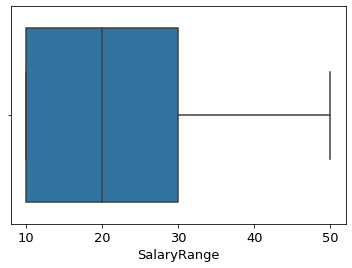

In [103]:
sb.boxplot(data['SalaryRange'],showfliers=False)

# distribution of SalaryRange, in general

In [14]:
data['Job'].value_counts().head(20)

Project Manager                    2789
Business Development Manager       1770
Registered Nurse                   1738
Business Analyst                   1553
Store Manager                      1153
Administration Assistant           992 
Eecutive Assistant                 882 
Customer Service Officer           871 
Receptionist                       868 
Site Manager                       827 
Senior Project Manager             786 
Account Manager                    772 
Casual Café All                    738 
Recruitment Consultant             737 
Physiotherapist                    714 
Administration Officer             707 
Senior Business Analyst            705 
Customer Service Representative    646 
Assistant Store Manager            641 
Property Manager                   636 
Name: Job, dtype: int64

In [15]:
g1 = data[['HighestSalary','LowestSalary']].groupby(data['Job']).agg({'HighestSalary':['max','min'],'LowestSalary':['max','min']}).reset_index()
g1

Job  \
                                                                                       
0                                                                                      
1                                                 Laboratory Sales Specialist          
2           General Entry Meat Process Worker                                          
3          FULL TIME SALES //  INTERNATIONAL LUXURY BOUTIQUE // HOMEBUSH OUTLET        
4          Retail Managers Australian Luury Label                                      
5          Senior Business Analyst                                                     
6         .NET contract ops                                                            
7         .Net Developers (C#) Mid Level (                                             
8         AO Legal Secretaries                                                         
9         APS Policy Officer                                                           
10        APS/ Administrators                                                          
11        Accounts Payable Officers                                                    
12        Accredited Eercise Physiologist / Eercise Scientist +   Physiotherapist      
13        Aisle Master Forklift Operators                                              
14        Allied Health Assistants                                                     
15        Ancillary Operators                                                          
16        Asphalt Workers Required                                                     
17        Assistant & Store Managers                                                   
18        Assistant Managers                                                           
19        Assistant Managers  South + East VIC  Nike                                   
20        Assistant Managers // SYDNEY // Nike                                         
21        Assistant Managers // Sydney // Do you live and breathe Culture & Street??   
22        Assistant Managers // VIC // Nike                                            
23        Assistant Managers Wanted Before Xmas                                        
24        Assistants                                                                   
25        Audit Intermediates                                                          
26        Automation Cucumber Tester Test Consultants                                  
27        BOUTIQUE MANAGERS / Perth / ICONIC NAME IN LUXURY FASHION                    
28        Boarding Managers & House Parents Full                                       
29        Boilermaker                                                                  
...                                          ...                                       
111535  truck driver feed tanker                                                       
111536  tyre fitter for field service                                                  
111537  using IBM Integration Bus IBM WebSphere Message Broker and MQ Series           
111538  vITM (Virtual IT Manager) / Problem Management                                 
111539  vRA Consultant / Architect                                                     
111540  vans/utes with  racks/trucks with tailgate/flatbed/taut liner/                 
111541  videographer / photographer                                                    
111542  waiter                                                                         
111543  waiter/waitress                                                                
111544  waitress/waiter/kitchencrew/chef/cook                                          
111545  warehouse store assistant                                                      
111546  water                                                                          
111547  wd Sales Specialist                                                            
111548  wd accessories fitter/Mec

## 2) Study the market by locations

### o What is the market size in each city? Which are the hottest job sectors in each city ?

In [19]:
l_c = data[['Location', 'SubClassification']][:100]
l_c

,Location,SubClassification
0,Sydney,Retail Assistants
1,Richmond & Hawkesbury,Retail Assistants
2,Brisbane,Retail Assistants
3,Gosford & Central Coast,Retail Assistants
4,Sydney,Sales - Inbound
5,Sydney,Customer Service - Call Centre
6,Adelaide,Waiting Staff
7,Brisbane,Waiting Staff
8,Melbourne,Sales - Outbound
9,Melbourne,Kitchen & Sandwich Hands


In [20]:
#Which Classification is hottest in each city
pv = pd.pivot_table(data, index = 'SubClassification', columns = 'Location', aggfunc = {'Classification':'count'}, fill_value = 0)
pv

Classification           \
Location                                        ACT Adelaide   
SubClassification                                              
Account & Relationship Management     24             46        
Accounts Officers/Clerks              26             31        
Accounts Payable                      3              10        
Accounts Receivable/Credit Control    3              8         
Actuarial                             0              1         
Administration                        14             17        
Administrative Assistants             151            166       
Aerospace Engineering                 11             4         
Aged & Disability Support             31             84        
Agency Account Management             0              1         
Agronomy & Farm Services              1              7         
Air Conditioning & Refrigeration      17             17        
Air Force                             4              0         
Airlines                              1              0         
Ambulance/Paramedics                  0              3         
Analysis & Reporting                  13             15        
Analysts                              13             2         
Architects                            193            26        
Architectural Drafting                5              8         
Architecture                          14             7         
Army                                  1              0         
Art Direction                         0              1         
Assembly & Process Work               4              58        
Assessment                            1              3         
Assistant Accountants                 2              8         
Audit - External                      4              10        
Audit - Internal                      7              0         
Automotive Engineering                0              0         
Automotive Trades                     45             164       
Aviation Services                     7              7         
...                                  ..             ..         
Teaching - Secondary                  12             26        
Teaching - Tertiary                   9              17        
Teaching - Vocational                 12             21        
Teaching Aides & Special Needs        1              8         
Team Leaders                          9              6         
Team Leaders/Supervisors              3              14        
Technical Writing                     36             1         
Technicians                           24             69        
Telecommunications                    7              11        
Testing & Quality Assurance           107            24        
Tour Guides                           0              0         
Trade Marketing                       0              2         
Training & Development                12             11        
Travel Agents/Consultants             7              24        
Treasury                              1              0         
Tutoring                              1              4         
Underwriting                          4              2         
Urban Design & Planning               4              1         
Valuation                             4              3         
Veterinary Services & Animal Welfare  2              1         
Volunteer Coordination & Support      2              1         
Waiting Staff                         77             77        
Warehousing, Storage & Distribution   42             138       
Water & Waste Engineering             5              2         
Web & Interaction Design              12             3         
Web Development & Production          47             7         
Welders & Boilermakers                2              68        
Winery & Viticulture                  0              4         
Workers' Compensation                 5              7         
Workp

In [21]:
#Which job is hottest in each city
pv = pd.pivot_table(data, index = 'Job', columns = 'Location', aggfunc = {'Job':'nunique'}, fill_value = 0)
pv

Job  \
Location                                                                     ACT   
Job                                                                                
                                                                              0    
                                          Laboratory Sales Specialist         0    
    General Entry Meat Process Worker                                         0    
   FULL TIME SALES //  INTERNATIONAL LUXURY BOUTIQUE // HOMEBUSH OUTLET       0    
   Retail Managers Australian Luury Label                                     0    
   Senior Business Analyst                                                    0    
  .NET contract ops                                                           0    
  .Net Developers (C#) Mid Level (                                            0    
  AO Legal Secretaries                                                        0    
  APS Policy Officer                                                          0    
  APS/ Administrators                                                         1    
  Accounts Payable Officers                                                   0    
  Accredited Eercise Physiologist / Eercise Scientist +   Physiotherapist     0    
  Aisle Master Forklift Operators                                             0    
  Allied Health Assistants                                                    0    
  Ancillary Operators                                                         0    
  Asphalt Workers Required                                                    0    
  Assistant & Store Managers                                                  0    
  Assistant Managers                                                          0    
  Assistant Managers  South + East VIC  Nike                                  0    
  Assistant Managers // SYDNEY // Nike                                        0    
  Assistant Managers // Sydney // Do you live and breathe Culture & Street??  0    
  Assistant Managers // VIC // Nike                                           0    
  Assistant Managers Wanted Before Xmas                                       0    
  Assistants                                                                  0    
  Audit Intermediates                                                         0    
  Automation Cucumber Tester Test Consultants                                 0    
  BOUTIQUE MANAGERS / Perth / ICONIC NAME IN LUXURY FASHION                   0    
  Boarding Managers & House Parents Full                                      0    
  Boilermaker                                                                 0    
...                                                                          ..    
truck driver feed tanker                                                      0    
tyre fitter for field service                                                 0    
using IBM Integration Bus IBM WebSphere Message Broker and MQ Series          1    
vITM (Virtual IT Manager) / Problem Management                                0    
vRA Consultant / Architect                                                    0    
vans/utes with  racks/trucks with tailgate/flatbed/taut liner/                0    
videographer / photographer                                                   0    
waiter                                                                        0    
waiter/waitress                                                               0    
waitress/waiter/kitchencrew/chef/cook                                         0    
warehouse store assistant                                                     0    
water                                                                         0    
wd Sales Specialist                                                           0    
wd accessories fitter/Mechanic/auto elec                                      0    
webMethods Developer / Architect             

In [26]:
#Which classification pay higher than others
g2 = data['SalaryRange'].groupby(data['Classification']).mean().reset_index().sort_values('SalaryRange', ascending = False)
g2

,Classification,SalaryRange
4,CEO & General Management,257.386256
17,Information & Communication Technology,147.513511
8,Consulting & Strategy,111.236318
14,Healthcare & Medical,89.081182
7,Construction,73.256928
22,"Mining, Resources & Energy",72.685592
19,Legal,69.412792
3,Banking & Financial Services,65.025254
11,Engineering,61.667854
13,Government & Defence,55.516861


In [28]:
#Which job pay higher than others
g2 = data['SalaryRange'].groupby(data['Job']).mean().reset_index().sort_values('Job', ascending = False)
g2

,Job,SalaryRange
111564,️️ STORE & ASSISTANT MANAGERS️️ UNISEX // ACTIVE // APPAREL // FOOTWEAR,30.000000
111563,️MANAGEMENT SUPERSTARS ️ Begin the New Year close to home NORTHERN BEACHES,10.000000
111562,️ ️ NEW YEAR NEW CAREER,10.000000
111561,️ ️ BRING IN THE NEW YEAR WITH A NEW CAREER,10.000000
111560,️ Senior Retail Managers ️ this international retailer is taking over,30.000000
111559,️ NEW YEAR NEW YOU,30.000000
111558,° CRA/Clinical Research Associate with minimal travel,17.500000
111557,yard person,10.000000
111556,workshop labourer,10.000000
111555,workshop Labourers,10.000000


>Base on the table above. We can see that jobs that related to 'Information & Communication Technology' have high average salary and most appearances.

In [29]:
pv.reset_index()

Job  \
Location                                                                                 
0                                                                                        
1                                                   Laboratory Sales Specialist          
2             General Entry Meat Process Worker                                          
3            FULL TIME SALES //  INTERNATIONAL LUXURY BOUTIQUE // HOMEBUSH OUTLET        
4            Retail Managers Australian Luury Label                                      
5            Senior Business Analyst                                                     
6           .NET contract ops                                                            
7           .Net Developers (C#) Mid Level (                                             
8           AO Legal Secretaries                                                         
9           APS Policy Officer                                                           
10          APS/ Administrators                                                          
11          Accounts Payable Officers                                                    
12          Accredited Eercise Physiologist / Eercise Scientist +   Physiotherapist      
13          Aisle Master Forklift Operators                                              
14          Allied Health Assistants                                                     
15          Ancillary Operators                                                          
16          Asphalt Workers Required                                                     
17          Assistant & Store Managers                                                   
18          Assistant Managers                                                           
19          Assistant Managers  South + East VIC  Nike                                   
20          Assistant Managers // SYDNEY // Nike                                         
21          Assistant Managers // Sydney // Do you live and breathe Culture & Street??   
22          Assistant Managers // VIC // Nike                                            
23          Assistant Managers Wanted Before Xmas                                        
24          Assistants                                                                   
25          Audit Intermediates                                                          
26          Automation Cucumber Tester Test Consultants                                  
27          BOUTIQUE MANAGERS / Perth / ICONIC NAME IN LUXURY FASHION                    
28          Boarding Managers & House Parents Full                                       
29          Boilermaker                                                                  
...                                            ...                                       
111535    truck driver feed tanker                                                       
111536    tyre fitter for field service                                                  
111537    using IBM Integration Bus IBM WebSphere Message Broker and MQ Series           
111538    vITM (Virtual IT Manager) / Problem Management                                 
111539    vRA Consultant / Architect                                                     
111540    vans/utes with  racks/trucks with tailgate/flatbed/taut liner/                 
111541    videographer / photographer                                                    
111542    waiter                                                                         
111543    waiter/waitress                                                                
111544    waitress/waiter/kitchencrew/chef/cook                                          
111545    warehouse store assistant                                                      
111546    water                                                                          
111547    wd Sales Specialist    

In [30]:
#Which job type has recruited more than others by location ?
pv1 = pd.pivot_table(data, index = 'Location',columns = 'JobType', aggfunc = {'JobType': 'count'} )
pv1

# NA could be considered not to care

JobType                          \
JobType                              Casual/Vacation Contract/Temp Full Time   
Location                                                                       
ACT                                   350             2166          3037       
Adelaide                              788             1084          3933       
Adelaide Hills & Barossa              46              23            91         
Albany & Great Southern               17              20            73         
Albury Area                           46              46            255        
Alice Springs & Central Australia     24              47            193        
Bairnsdale & Gippsland                28              52            198        
Ballarat & Central Highlands          62              66            355        
Bendigo, Goldfields & Macedon Ranges  121             64            444        
Blue Mountains & Central West         111             141           545        
Brisbane                              1886            4115          13004      
Broome & Kimberley                    31              43            171        
Bunbury & South West                  106             88            344        
Bundaberg & Wide Bay Burnett          59              49            253        
Cairns & Far North                    200             189           868        
Central & South East TAS              6               3             41         
Coffs Harbour & North Coast           67              82            224        
Coober Pedy & Outback SA              9               20            75         
Darwin                                113             214           790        
Devonport & North West                34              30            152        
Dubbo & Central NSW                   68              64            417        
Far West & North Central NSW          15              25            139        
Fleurieu Peninsula & Kangaroo Island  14              5             32         
Geraldton, Gascoyne & Midwest         26              80            193        
Gladstone & Central QLD               93              105           434        
Gold Coast                            621             389           2068       
Gosford & Central Coast               215             187           735        
Hervey Bay & Fraser Coast             45              30            163        
Hobart                                103             126           647        
Horsham & Grampians                   24              21            130        
...                                   ..              ..            ...        
Melbourne                             3453            7209          29680      
Mildura & Murray                      21              25            198        
Mornington Peninsula & Bass Coast     195             48            316        
Mt Gambier & Limestone Coast          15              26            94         
NA                                    9070            19944         79083      
Newcastle, Maitland & Hunter          489             523           2368       
Northam & Wheatbelt                   22              18            78         
Northern QLD                          165             253           854        
Perth                                 1157            2544          7753       
Port Hedland, Karratha & Pilbara      198             457           839        
Port Macquarie & Mid North Coast      63              81            245        
Richmond & Hawkesbury                 15              24            83         
Riverland & Murray Mallee             31              15            84         
Rockhampton & Capricorn Coast         73              126           423        
Shepparton & Goulburn Valley          67              60            317        
Somerset & Lockyer                    16              3             39         
South West Coast VIC                  250    

In [32]:
#Which sectors is recruited most
data[(data.Classification!='NA')]['Classification'].value_counts()

# NA could be considered not to care

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                9368 
Education & Training                      9280 
Construction                              8372 
Sales                                     8119 
Retail & Consumer Products                8041 
Government & Defence                      7443 
Engineering                               6458 
Mining, Resources & Energy                6288 
Banking & Financial Services              4633 
Community Services & Development          4485 
Legal                                     4237 
Human Resources & Recruitment             4144 
Call Centre & Customer Service            3971 
Marketing & Communications                3968 
Real Estate & Property                  

### o Which range of salary is common in each city ? Where are the employees more well-paid ? 

In [38]:
data[(data.Location!='NA')].SalaryRange.value_counts()

10     89867
30     53242
20     29838
50     15802
799    8480 
Name: SalaryRange, dtype: int64

> The range of salary is common (for all), as below:
> + Range=10, this may be 0-10
> + Range=30, this may be 0-30

In [39]:
#Which range of salary that location have most ?
g4 = data[['HighestSalary', 'LowestSalary']].groupby(data['Location']).agg({'HighestSalary':['max','min'],
                                                                         'LowestSalary':['max','min']}).reset_index()
g4.head(20)

Location HighestSalary     LowestSalary    
                                                   max min          max min
0   ACT                                   999           30  200          0 
1   Adelaide                              999           30  200          0 
2   Adelaide Hills & Barossa              999           30  200          0 
3   Albany & Great Southern               999           30  200          0 
4   Albury Area                           999           30  200          0 
5   Alice Springs & Central Australia     999           30  200          0 
6   Bairnsdale & Gippsland                999           30  200          0 
7   Ballarat & Central Highlands          999           30  200          0 
8   Bendigo, Goldfields & Macedon Ranges  999           30  200          0 
9   Blue Mountains & Central West         999           30  200          0 
10  Brisbane                              999           30  200          0 
11  Broome & Kimberley                    999           30  200          0 
12  Bunbury & South West                  999           30  200          0 
13  Bundaberg & Wide Bay Burnett          999           30  200          0 
14  Cairns & Far North                    999           30  200          0 
15  Central & South East TAS              150           30  120          0 
16  Coffs Harbour & North Coast           999           30  200          0 
17  Coober Pedy & Outback SA              999           30  200          0 
18  Darwin                                999           30  200          0 
19  Devonport & North West                999           30  200          0

>From the table above : The range (999-200) has appear many times so it become common range in each city 

In [31]:
#Which city have better salary
g = data['RangeSalary'].groupby(data['Location']).mean().reset_index().sort_values('RangeSalary', ascending = False)
print('City with higher salary: \n',g)

City with higher salary: 
                                 Location  RangeSalary
0                                    ACT   112.543840
45      Port Macquarie & Mid North Coast    77.793177
13          Bundaberg & Wide Bay Burnett    66.026895
57                 Tumut, Snowy & Monaro    65.523256
60                           Western QLD    64.770428
54                                Sydney    62.869036
31        Katherine & Northern Australia    60.213904
37                      Mildura & Murray    58.286645
10                              Brisbane    55.745784
23         Geraldton, Gascoyne & Midwest    55.266862
42                          Northern QLD    53.337575
18                                Darwin    51.998420
11                    Broome & Kimberley    51.197880
43                                 Perth    50.221852
36                             Melbourne    49.730413
48         Rockhampton & Capricorn Coast    49.700549
6                 Bairnsdale & Gippsland    49.587302
5

> Top 3 place to work : ACT,  Port Macquarie & Mid North Coast, Bundaberg & Wide Bay Burnet

### o Can you detect the pattern of posting ?

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 14 columns):
Title                318477 non-null object
Company              318477 non-null object
Date                 318477 non-null object
Location             318477 non-null object
Area                 318477 non-null object
Classification       318477 non-null object
SubClassification    318477 non-null object
Requirement          318477 non-null object
FullDescription      318477 non-null object
JobType              318477 non-null object
LowestSalary         318477 non-null int64
HighestSalary        318477 non-null int64
Job                  318477 non-null object
SalaryRange          318477 non-null int64
dtypes: int64(3), object(11)
memory usage: 34.0+ MB


In [76]:
data.Date=pd.to_datetime(data.Date)
dj=data.Date.dt.day.value_counts()
dj=pd.DataFrame(dj)
dj=dj.reset_index().rename(columns={'index':'Date','Date':'Number of job posts'})
dj

,Date,Number of job posts
0,10,20138
1,12,17503
2,4,16728
3,18,16151
4,9,15822
5,17,15539
6,11,15448
7,5,15028
8,13,14793
9,14,14656


In [57]:
dj.columns

Index(['Date', 'Number of job posts'], dtype='object')

In [77]:
fig = px.scatter(dj, x="Date", y="Number of job posts",size="Number of job posts", color="Number of job posts", log_x=True, size_max=60)
fig.show()

In [75]:
## We try once more when null data is not much
data.Date=pd.to_datetime(data.Date)
dj=data[(data.Location!='NA')].Date.dt.day.value_counts()
dj=pd.DataFrame(dj)
dj=dj.reset_index().rename(columns={'index':'Date','Date':'Number of job posts'})
fig = px.scatter(dj, x="Date", y="Number of job posts",size="Number of job posts", color="Number of job posts", log_x=True, size_max=60)
fig.show()

> From above bubble charts, we found clearly, more jobs posted from second half of the month. 

## 3) Study the markets by sectors

### o Which sectors keep the highest market share in each city? 

In [31]:
# Glance at which sectors appear most 
data['Classification'].value_counts()

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

In [33]:
# When Classification = 'Information & Communication Technology'. How many othes NAN values in other columns
(data[data['Classification'] == 'Information & Communication Technology'].isnull() == True).sum()

Id                      0
Title                   0
Company               349
Date                    0
Location                0
Area                 6706
Classification          0
SubClassification       0
Requirement             0
FullDescription      1634
LowestSalary            0
HighestSalary           0
JobType              1633
dtype: int64

In [34]:
# When Classification = 'Trades and Services'. How many othes NAN values in other columns
(data[data['Classification'] == 'Trades and Services'] .isnull() == True).sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [36]:
# When Classification = 'Healthcare and Medical'. How many othes NAN values in other columns
(data[data['Classification'] == 'Healthcare and Medical'] .isnull() == True).sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [39]:
# When Classification = 'AccouAdministration & Office Supportnting'. How many othes NAN values in other columns
(data[data['Classification'] == 'Accounting'] .isnull() == True).sum()

Id                      0
Title                   0
Company               312
Date                    0
Location                0
Area                 2060
Classification          0
SubClassification       0
Requirement             0
FullDescription       608
LowestSalary            0
HighestSalary           0
JobType               608
dtype: int64

In [153]:
# When Classification = 'Administration & Office Support'. How many othes NAN values in other columns
(data[data['Classification'] == 'CEO & General Management'] .isnull() == True).sum()

Id                     0
Title                  0
Company               33
Date                   0
Location               0
Area                 414
Classification         0
SubClassification      0
Requirement            0
FullDescription       61
LowestSalary           0
HighestSalary          0
JobType               61
SubClass2              0
dtype: int64

In [319]:
#See which classification pay more average salary
g3 = data['RangeSalary'].groupby(data['Classification']).mean().reset_index()
g3 = g3.sort_values('RangeSalary', ascending =False)
g3

,Classification,RangeSalary
4,CEO & General Management,257.386256
17,Information & Communication Technology,147.513511
8,Consulting & Strategy,111.236318
14,Healthcare & Medical,89.081182
7,Construction,73.256928
22,"Mining, Resources & Energy",72.685592
19,Legal,69.412792
3,Banking & Financial Services,65.025254
11,Engineering,61.667854
13,Government & Defence,55.516861


> From the table above. We can see that CEO & General Management and Information & Communication Technology has high salary. But,Information & Communication Technology have recruited more . So we say that Information & Communication Technology keep highest market share

### o In each sector, which sub-sectors keep the main spotlights?

In [179]:
pv_1 = pv.reindex(pv['SubClassification'].sort_values(by='Accounting', ascending=False).index)
pv_1

SubClassification             \
Classification                                          Accounting   
114                    Financial Accounting & Reporting       1183   
45               Business Services & Corporate Advisory       1104   
1                              Accounts Officers/Clerks        929   
115                    Financial Managers & Controllers        887   
237                                             Payroll        695   
3                    Accounts Receivable/Credit Control        612   
186                   Management Accounting & Budgeting        549   
2                                      Accounts Payable        531   
15                                 Analysis & Reporting        530   
305                                            Taxation        495   
24                                Assistant Accountants        427   
40              Bookkeeping & Small Practice Accounting        348   
25                                     Audit - External        175   
26                                     Audit - Internal        174   
232                                               Other        148   
175                                          Management        146   
295                                 Strategy & Planning         91   
69                                    Compliance & Risk         72   
301                       Systems Accounting & IT Audit         61   
322                                            Treasury         53   
154                     Insolvency & Corporate Recovery         49   
80                                      Cost Accounting         41   
159                            Inventory & Fixed Assets         25   
123                 Forensic Accounting & Investigation         24   
68                                  Company Secretaries         19   
230                                             Optical          0   
228                              Oil & Gas - Operations          0   
227                Oil & Gas - Exploration & Geoscience          0   
226               Oil & Gas - Engineering & Maintenance          0   
225                                Oil & Gas - Drilling          0   
..                                                  ...        ...   
100                              Engineering - Software          0   
110                                         Farm Labour          0   
99                                Engineering - Network          0   
98                               Engineering - Hardware          0   
97                                  Employment Services          0   
96                                   Emergency Services          0   
95                                         Electricians          0   
94                    Electrical/Electronic Engineering          0   
93                                 Editing & Publishing          0   
109                                          Family Law          0   
111                                     Farm Management          0   
132                               General Practitioners          0   
124                              Foreperson/Supervisors          0   
131                             Gardening & Landscaping          0   
130                                              Gaming          0   
129                                    Funds Management          0   
128                                         Fundraising          0   
127                                 Fund Administration          0   
126                       Front Office & Guest Services          0   
125                            Freight/Cargo Forwarding          0   
122                            Food Technology & Safety          0   
112                            Fashion & Textile Design          0   
121                                           Floristry          0   
120                                    Fleet Management          0   
119                       Fitters, Turners & Mac

In [170]:
#Sector and sub-sectors
pv = pd.pivot_table(data, columns = 'Classification', index = 'SubClassification', aggfunc = {'SubClassification':'count'},fill_value = 0).reset_index()
pv

SubClassification             \
Classification                                       Accounting   
0                  Account & Relationship Management          0   
1                           Accounts Officers/Clerks        929   
2                                   Accounts Payable        531   
3                 Accounts Receivable/Credit Control        612   
4                                          Actuarial          0   
5                                     Administration          0   
6                          Administrative Assistants          0   
7                              Aerospace Engineering          0   
8                          Aged & Disability Support          0   
9                          Agency Account Management          0   
10                          Agronomy & Farm Services          0   
11                  Air Conditioning & Refrigeration          0   
12                                         Air Force          0   
13                                          Airlines          0   
14                              Ambulance/Paramedics          0   
15                              Analysis & Reporting        530   
16                                          Analysts          0   
17                                        Architects          0   
18                            Architectural Drafting          0   
19                                      Architecture          0   
20                                              Army          0   
21                                     Art Direction          0   
22                           Assembly & Process Work          0   
23                                        Assessment          0   
24                             Assistant Accountants        427   
25                                  Audit - External        175   
26                                  Audit - Internal        174   
27                            Automotive Engineering          0   
28                                 Automotive Trades          0   
29                                 Aviation Services          0   
..                                               ...        ...   
308                             Teaching - Secondary          0   
309                              Teaching - Tertiary          0   
310                            Teaching - Vocational          0   
311                   Teaching Aides & Special Needs          0   
312                                     Team Leaders          0   
313                         Team Leaders/Supervisors          0   
314                                Technical Writing          0   
315                                      Technicians          0   
316                               Telecommunications          0   
317                      Testing & Quality Assurance          0   
318                                      Tour Guides          0   
319                                  Trade Marketing          0   
320                           Training & Development          0   
321                        Travel Agents/Consultants          0   
322                                         Treasury         53   
323                                         Tutoring          0   
324                                     Underwriting          0   
325                          Urban Design & Planning          0   
326                                        Valuation          0   
327             Veterinary Services & Animal Welfare          0   
328                 Volunteer Coordination & Support          0   
329                                    Waiting Staff          0   
330              Warehousing, Storage & Distribution          0   
331                        Water & Waste Engineering          0   
332                         Web & Interaction Design          0   
333                     Web Development & Production          0   
334                           Welders & Boilermakers          0   
335            

### o What is the salary range for each sector/sub-sectors? Can you compare salary range between sectors/sub-sectors?

In [131]:
#Salary Range of Classification
g = data[['HighestSalary','LowestSalary']].groupby(data['Classification']).agg({'HighestSalary':['max','min'],
                                                                                 'LowestSalary':['max','min']}).reset_index()
g

Classification HighestSalary     LowestSalary    
                                                     max min          max min
0                               Accounting           999  30          200   0
1          Administration & Office Support           999  30          200   0
2                Advertising, Arts & Media           999  30          200   0
3             Banking & Financial Services           999  30          200   0
4                 CEO & General Management           999  30          200   0
5           Call Centre & Customer Service           999  30          200   0
6         Community Services & Development           999  30          200   0
7                             Construction           999  30          200   0
8                    Consulting & Strategy           999  30          200   0
9                    Design & Architecture           999  30          200   0
10                    Education & Training           999  30          200   0
11                             Engineering           999  30          200   0
12         Farming, Animals & Conservation           999  30          200   0
13                    Government & Defence           999  30          200   0
14                    Healthcare & Medical           999  30          200   0
15                   Hospitality & Tourism           999  30          200   0
16           Human Resources & Recruitment           999  30          200   0
17  Information & Communication Technology           999  30          200   0
18              Insurance & Superannuation           999  30          200   0
19                                   Legal           999  30          200   0
20    Manufacturing, Transport & Logistics           999  30          200   0
21              Marketing & Communications           999  30          200   0
22              Mining, Resources & Energy           999  30          200   0
23                  Real Estate & Property           999  30          200   0
24              Retail & Consumer Products           999  30          200   0
25                                   Sales           999  30          200   0
26                    Science & Technology           999  30          200   0
27                         Self Employment           999  30          200   0
28                      Sport & Recreation           999  30          200   0
29                       Trades & Services           999  30          200   0

In [132]:
#Salary Range of SubClassification
g_sc = data[['HighestSalary','LowestSalary']].groupby(data['SubClassification']).agg({'HighestSalary':['max','min'],
                                                                                 'LowestSalary':['max','min']}).reset_index()
g_sc

SubClassification HighestSalary     LowestSalary    
                                                    max min          max min
0       Account & Relationship Management           999  30          200   0
1                Accounts Officers/Clerks           999  30          200   0
2                        Accounts Payable           999  30          200   0
3      Accounts Receivable/Credit Control           999  30          200   0
4                               Actuarial           200  30          150   0
5                          Administration           200  30          150   0
6               Administrative Assistants           999  30          200   0
7                   Aerospace Engineering           999  30          200   0
8               Aged & Disability Support           999  30          200   0
9               Agency Account Management           999  30          200   0
10               Agronomy & Farm Services           200  30          150   0
11       Air Conditioning & Refrigeration           999  30          200   0
12                              Air Force           150  30          120   0
13                               Airlines           200  30          150   0
14                   Ambulance/Paramedics           999  30          200   0
15                   Analysis & Reporting           999  30          200   0
16                               Analysts           999  30          200   0
17                             Architects           999  30          200   0
18                 Architectural Drafting           999  30          200   0
19                           Architecture           999  30          200   0
20                                   Army           999  50          200  40
21                          Art Direction           150  30          120   0
22                Assembly & Process Work           999  30          200   0
23                             Assessment           200  30          150   0
24                  Assistant Accountants           999  30          200   0
25                       Audit - External           999  30          200   0
26                       Audit - Internal           999  30          200   0
27                 Automotive Engineering           999  30          200   0
28                      Automotive Trades           999  30          200   0
29                      Aviation Services           999  30          200   0
..                                    ...           ...  ..          ...  ..
308                  Teaching - Secondary           999  30          200   0
309                   Teaching - Tertiary           999  30          200   0
310                 Teaching - Vocational           999  30          200   0
311        Teaching Aides & Special Needs           150  30          120   0
312                          Team Leaders           999  30          200   0
313              Team Leaders/Supervisors           999  30          200   0
314                     Technical Writing           999  30          200   0
315                           Technicians           200  30          150   0
316                    Telecommunications           999  30          200   0
317           Testing & Quality Assurance           999  30          200   0
318                           Tour Guides           120  30          100   0
319                       Trade Marketing           200  30          150   0
320                Training & Development           999  30          200   0
321             Travel Agents/Consultants           120  30          100   0
322                              Treasury           999  30          200   0
323                              Tutoring           999  30          200   0
324                          Underwriting           999  30          200   0
325               Urban Design & Planning           999  30          200   0
326                             Valuation           999  30          200   0
327  Veterinary Serv

> From the two result above, we have some appreciate:
     1. In the result of "Salary Range of Classification", salary range is the same with classification
     2. In the result of "Salary Range of SubClassification". some of SubClassification have different salary range.All of different values is decreased with others

> We can conclude that with each Classification, the salary depend on which positions you work in mean SubClassification

### o What is the trending of market. Which subjects should we recommend for young student ? 

In [137]:
#Top Classification in dataset
data['Classification'].value_counts()

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

> As we recognize above. Information and Communication Technology keep highest market share because this jobs appear most and have higher salary 

> From the table above. Information and Communication Technology is hottest.However, you should think about some instruction below :
>
           1.You must clearly understand all the aspect of this job
           2.Choose which major are the best fit 
           3.Define which skill should you learn
           
> More from top 10 hot jobs (high demands):
+ Trades & Services                         17976
+ Healthcare & Medical                      17085
+ Hospitality & Tourism                     15523
+ Manufacturing, Transport & Logistics      12376
+ Administration & Office Support           10020
+ Accounting                                 9368
+ Education & Training                       9280
+ Construction                               8372
+ Sales                                      8119

In [134]:
#Which place that employees well-paid
g_lo = data['RangeSalary'].groupby(data['Area']).mean().reset_index().sort_values('RangeSalary', ascending = False)
g_lo

,Area,RangeSalary
4,"CBD, Inner West & Eastern Suburbs",72.177501
2,CBD & Inner Suburbs,62.785794
13,Ryde & Macquarie Park,59.182143
3,"CBD, Inner & Western Suburbs",56.758707
7,North Shore & Northern Beaches,47.961989
11,Parramatta & Western Suburbs,47.304482
0,Bayside & Eastern Suburbs,38.662100
8,North West & Hills District,37.214698
16,Southern Suburbs & Sutherland Shire,34.757034
9,Northern Suburbs,33.040398


In [164]:
#See what Sub-Classification appear most
data['SubClassification'].value_counts()

Other                                    11349
Management                                6236
Chefs/Cooks                               4600
Administrative Assistants                 4572
Developers/Programmers                    4211
Retail Assistants                         3902
Government - State                        3701
Warehousing, Storage & Distribution       3636
Sales Representatives/Consultants         3370
Automotive Trades                         3262
Business/Systems Analysts                 2986
Waiting Staff                             2864
Bar & Beverage Staff                      2587
Programme & Project Management            2413
Project Management                        2395
Childcare & Outside School Hours Care     2383
Mining - Engineering & Maintenance        2174
Nursing - Aged Care                       2130
Customer Service - Call Centre            2087
Management - Store                        2031
Aged & Disability Support                 1966
Account & Rel

In [175]:
(data[data['SubClassification'] == 'Administrative Assistants '].isnull() == True).sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
SubClass2            0
dtype: int64

In [182]:
#Which sub-classification appear most
data['SubClassification'].value_counts()

Other                                    11349
Management                                6236
Chefs/Cooks                               4600
Administrative Assistants                 4572
Developers/Programmers                    4211
Retail Assistants                         3902
Government - State                        3701
Warehousing, Storage & Distribution       3636
Sales Representatives/Consultants         3370
Automotive Trades                         3262
Business/Systems Analysts                 2986
Waiting Staff                             2864
Bar & Beverage Staff                      2587
Programme & Project Management            2413
Project Management                        2395
Childcare & Outside School Hours Care     2383
Mining - Engineering & Maintenance        2174
Nursing - Aged Care                       2130
Customer Service - Call Centre            2087
Management - Store                        2031
Aged & Disability Support                 1966
Account & Rel

In [33]:
#Which sub-classification have higher salary
g_sc = data['RangeSalary'].groupby(data['SubClassification']).mean().reset_index().sort_values('RangeSalary', ascending = False)
g_sc

,SubClassification,RangeSalary
132,General Practitioners,515.411718
197,Medical Specialists,435.050802
50,COO & MD,397.372549
49,CEO,336.723926
17,Architects,289.502584
249,Police & Corrections,284.067797
257,Programme & Project Management,246.905512
133,General/Business Unit Manager,243.573077
68,Company Secretaries,198.736842
225,Oil & Gas - Drilling,198.388889


> Top 3 highest salary subclassification: General Practitioners, Medical Specialists, COO & MD

> Top 3 work areas : 
>
          1.CBD, Inner West & Eastern Suburbs	
          2.CBD & Inner Suburbs	
          3.Ryde & Macquarie Park	

In [39]:
data['Classification'].value_counts()

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

> As we recognize above. Information and Communication Technology keep highest market share because this jobs appear most and have higher salary 


### o Which skills are required in each sector?

In [86]:
data[data.Classification!='NA'].Classification.value_counts().head(10)

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                9368 
Education & Training                      9280 
Construction                              8372 
Sales                                     8119 
Name: Classification, dtype: int64

In [84]:
# Example about our observations
# Classification=Sales
data[data.Classification=='Sales'].tail(3)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,JobType,LowestSalary,HighestSalary,Job,SalaryRange
196970,Regional Sales Manager VIC & SA | HVAC | Electronic Security | Building Services,Building Services Recruitment Australia,2018-11-29,Melbourne,NA,Sales,Management,Global Company seeking exceptional Sales Leader VIC/ SA who understands what success looks like in a competitive market. Substantial size team and P&L,"About the Company\nOur Client is a diversified technology leader, creating intelligent buildings with integrated energy efficient systems that work together effortlessly. Serving a wide range of customers globally, they focus on common goals, working\n together and applying technical expertise to help their customers solve complex challenges.\nContinuing to grow their market share in ANZ they are now seeking an exceptional leader who understands what success looks like in a competitive market. The Regional Sales Manager VIC/ SA / TAS is an integral member\n of an experienced, high performing and supportive senior management team. \nAbout the Role\nAs the Regional Sales Manager you will lead a team of Account Managers, Sales Engineers, Estimators and Business Development Managers. You will be responsible for executing the Regional Sales Strategy to achieve sales growth,\n financial targets and customer service targets. You will foster a performance focused culture and improve employee satisfaction. This will be achieved through, increasing customer acquisition, improving customer retention and optimizing channel\n performance. Financial accountability includes revenue targets and a large P&L.\nYou Will Bring\n\nDemonstrated success in a Senior Strategic Business Development, Sales or a Bid Management role within Building Services with targets exceeding $100 million PA\nAn established network at senior levels within the HVAC, Facilities Services, Electrical, Hydraulic, Fire or Electronic Security Industries\nThe ability to identify and successfully pursue growth opportunities in diversified markets, working with key stakeholders and technical experts\nProven success in Bid Management and/ or Tender for Service Contracts in excess of $50 million PA\nA strong desire and capability to partner with clients to understand their business and their requirements enabling a tailored solution that exceeds their expectations\nExperience identifying coaching opportunities and managing performance to ensure a high performing culture is sustained\nA growth mindset and genuine desire to lead by example; committing to continuous improvement, sustainability, belonging and inclusion\nDemonstrated leadership and senior management experience across operations, sales and business growth, customer service and retention and people management\nTertiary qualifications in Engineering (Electrical, Mechanical, Hydraulics), Business, Commerce or other relevant discipline\nPost graduate qualifications in Business, Management, Finance or Sales and Marketing advantageous\nA high level of business acumen and superior communication skills with the ability to develop relationships at all levels of industry\nAn ability and willingness to take ownership and accountability for your region's performance and results\n\nYou will be Offered\n\nSenior executive role with attractive and competitive remuneration package commensurate with experience\nA career opportunity with a global business striving to make a difference in the world\n\nIf you are ready to make a change Click on the Apply button to submit your application.\nPlease note that only shortlisted candidates will be contacted.",Full Time,200,999,Regional Sales Manager VIC & SA,799
197006,Solar Sales Consultant,NA,2018-11-29,Brisbane,CBD & Inner Suburbs,Sales,Sales Representatives/Consultants,Renewable Energy Solar Sales,"Solar Sales Consultant 3 positions, Brisbane East and Ipswich, Brisbane North These positions suit: Experienced solar sales people or ex

> - There's still wrong format information in column FullDescription as at index=196970
> - We will try to detect skills from top 3 sectors by long observations since it's hard to find out them by analyze text in Requirement or FullDescription

In [87]:
data[data.Classification!='NA'].Classification.value_counts().head(3)

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Name: Classification, dtype: int64

Some needed skills for top 3 sectors:
> + Information & Communication Technology
>> - Strong experience with IT devices (priority: computer)
>> - Technical support skills
>> - Team-work skills
> + Trades & Services
>> - Soft skilss, reliable
>> - Leadership skills
> + Healthcare & Medical
>> - Expertise on an certain medical field
>> - High responsibility

## 4) Visualize the results on an interactive web page 

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [108]:
data.columns

Index(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'JobType',
       'LowestSalary', 'HighestSalary', 'Job', 'SalaryRange'],
      dtype='object')

In [111]:
data.describe()

,LowestSalary,HighestSalary,SalaryRange
count,318477.000000,318477.000000,318477.000000
mean,65.813544,114.432342,48.618798
std,51.063125,177.594941,145.152023
min,0.000000,30.000000,10.000000
25%,30.000000,40.000000,10.000000
50%,60.000000,70.000000,20.000000
75%,100.000000,120.000000,30.000000
max,200.000000,999.000000,799.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 14 columns):
Title                318477 non-null object
Company              318477 non-null object
Date                 318477 non-null datetime64[ns]
Location             318477 non-null object
Area                 318477 non-null object
Classification       318477 non-null object
SubClassification    318477 non-null object
Requirement          318477 non-null object
FullDescription      318477 non-null object
JobType              318477 non-null object
LowestSalary         318477 non-null int64
HighestSalary        318477 non-null int64
Job                  318477 non-null object
SalaryRange          318477 non-null int64
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 34.0+ MB


In [7]:
# @interact
def show_number_of_job(Location,Sector):
#     print('Number of jobs by Location and Sector')
    return data[(data.Location==Location) & (data.Classification==Sector)].Job.value_counts()

list_sector=data.Classification.unique()
list_loc=data.Location.unique()
interact(show_number_of_job,Location=list_loc,Sector=list_sector)

interactive(children=(Dropdown(description='Location', options=('Sydney', 'Richmond & Hawkesbury', 'Brisbane',…

<function __main__.show_number_of_job(Location, Sector)>

In [13]:
# @interact
def show_salary(Location,Sector):
    print('Average Slowest Salary: ', round(data[(data.Location==Location) & (data.Classification==Sector)].LowestSalary.mean(),2),'$')
    print('Average Highest Salary: ', round(data[(data.Location==Location) & (data.Classification==Sector)].HighestSalary.mean(),2),'$')
    # Currency unit is $ for good loook ^^

interact(show_salary,Location=list_loc,Sector=list_sector)

interactive(children=(Dropdown(description='Location', options=('Sydney', 'Richmond & Hawkesbury', 'Brisbane',…

<function __main__.show_salary(Location, Sector)>

In [136]:
data.Date.dt.year.value_counts()

2018    226396
2019    92081 
Name: Date, dtype: int64

In [144]:
data.columns

Index(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'JobType',
       'LowestSalary', 'HighestSalary', 'Job', 'SalaryRange'],
      dtype='object')

In [ ]:
sb.regplot(x='Area',y='LowestSalary',data=data, fit_reg=True) 

In [12]:
data.Date=pd.to_datetime(data.Date)
data['Month']=data.Date.dt.month
data['Year']=data.Date.dt.year
data['Day']=data.Date.dt.day
data.head(2)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,JobType,LowestSalary,HighestSalary,Job,Month,Year,Day
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves on filling&#8232; shelves faster than anyone else in the industry. \n,NA,NA,0,30,Casual Stock Replenisher,10,2018,7
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NA,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves on filling &#8232;shelves faster than anyone else in the industry. \n,NA,NA,0,30,Casual Stock Replenisher,10,2018,7


In [10]:
data[(data.Year==2019)].Month.value_counts()

1    69676
2    22003
3    402  
Name: Month, dtype: int64

In [24]:
# @interact
def show_salary_trend(Month,Year):
    data_new=data[(data.Month==Month) & (data.Year==Year)]
    plt.plot( 'Day', 'HighestSalary', data=data_new, marker='o', markerfacecolor='red', markersize=12, color='bisque', linewidth=4)
    plt.plot( 'Day', 'LowestSalary', data=data_new, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.legend()

month=widgets.IntSlider(min=1,max=12,value=12,description='Month ')
year=widgets.IntSlider(min=2018,max=2019,value=2,description='Year ')

interact(show_salary_trend,Month=month,Year=year)
# display(show_salary_trend,Month=month,Year=year)

interactive(children=(IntSlider(value=12, description='Month ', max=12, min=1), IntSlider(value=2018, descript…

<function __main__.show_salary_trend(Month, Year)>

## 5) PySpark 

In [112]:
#Import library for PySpark
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [84]:
#Create Spark Session
spark = SparkSession.builder \
       .master("local[2]") \
       .appName("test") \
       .config("spark.driver.memory", "10g").getOrCreate()

In [85]:
#Import data file via PySpark
path = 'D:/Data Mining/UIT_bigdata_labs_2019/assignment/data.csv'
df_s = spark.read.csv(path,header = True)

In [87]:
df_s.show()

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+------------+-------------+-------+
|      Id|               Title|             Company|                Date|            Location|                Area|      Classification|   SubClassification|         Requirement|FullDescription|LowestSalary|HighestSalary|JobType|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+------------+-------------+-------+
|37404348|Casual Stock Repl...|         Aldi Stores|2018-10-07T00:00:...|              Sydney|North West & Hill...|Retail & Consumer...|   Retail Assistants|Our Casual Stock ...|           null|        null|         null|   null|
| ,,0,30,|                null|                null|                null|       

In [48]:
#Groupby Salary by Location
df_s.groupby(['Location']).agg({'HighestSalary':'mean'}).show()

+--------------------+------------------+
|            Location|avg(HighestSalary)|
+--------------------+------------------+
| school staff and...|              null|
|    local government|              null|
| ""Senior Contrac...|              null|
| Sydney office. T...|              null|
| monthly bank rec...|              null|
| learning these t...|              null|
| governmental and...|              null|
| Technologies (Di...|              null|
| Rail and Trades ...|              null|
| complex Corporat...|              null|
|         or projects|              null|
|  and services.</li>|              null|
| Nuclear Science ...|              null|
| foremen and elec...|              null|
| Sales Performanc...|              null|
|   advanced diplomas|              null|
| authentication a...|              null|
|               risks|              null|
| innovative PSC s...|              null|
| including: disas...|              null|
+--------------------+------------

In [88]:
#Groupby Sub-Classification by Location
df_s.groupby(['Location']).agg({'SubClassification':'count'}).show()

+--------------------+------------------------+
|            Location|count(SubClassification)|
+--------------------+------------------------+
| school staff and...|                       0|
|    local government|                       0|
| ""Senior Contrac...|                       1|
| Sydney office. T...|                       0|
| monthly bank rec...|                       0|
| learning these t...|                       0|
| governmental and...|                       0|
| Technologies (Di...|                       0|
| Rail and Trades ...|                       0|
| complex Corporat...|                       0|
|         or projects|                       0|
|  and services.</li>|                       0|
| Nuclear Science ...|                       0|
| foremen and elec...|                       0|
| Sales Performanc...|                       0|
|   advanced diplomas|                       0|
| authentication a...|                       0|
|               risks|                  

> We just do some with PySpark because in general, it support to analyze faster and many other things look the same. We use Python mainly at very first tiem for more convenience (visulization, interactive things, etc)